In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing

from statsmodels.tsa.stattools import adfuller                             

import warnings                                                         
warnings.filterwarnings('ignore')

C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df = pd.read_csv('DS3_C1_S2_Weather_Data_Practice.csv',parse_dates=['Date'])
print(df.shape)
df.head()

(3650, 2)


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [24]:
# TASK 1
df1 = df.set_index('Date')
df1

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [6]:
lags = 100

moving_avg = df1.rolling(window=lags).mean()

df_ts = pd.DataFrame({'Actual':df1['Temp'], 'MA':moving_avg['Temp']})
df_ts

,Actual,MA
Date,,
1981-01-01,20.7,NaN
1981-01-02,17.9,NaN
1981-01-03,18.8,NaN
1981-01-04,14.6,NaN
1981-01-05,15.8,NaN
...,...,...
1990-12-27,14.0,12.416
1990-12-28,13.6,12.436
1990-12-29,13.5,12.408


In [8]:
df_ts.isnull().sum()

Actual     0
MA        99
dtype: int64

In [9]:
df_ts.head(lags)

,Actual,MA
Date,,
1981-01-01,20.7,NaN
1981-01-02,17.9,NaN
1981-01-03,18.8,NaN
1981-01-04,14.6,NaN
1981-01-05,15.8,NaN
...,...,...
1981-04-06,16.6,NaN
1981-04-07,10.0,NaN
1981-04-08,14.9,NaN


In [10]:
df_ts.Actual.head(lags).mean()

16.191999999999997

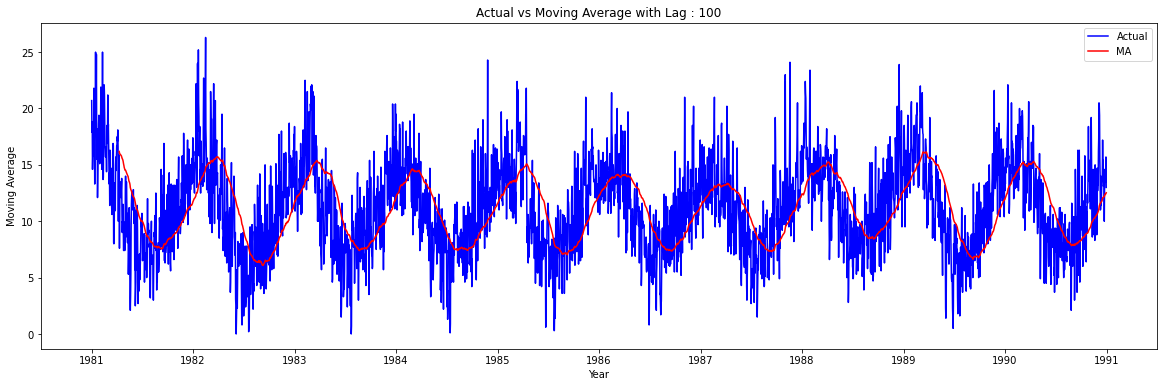

In [11]:
plt.figure(figsize=(20,6))
plt.plot(df_ts.Actual, color='blue', label='Actual')
plt.plot(df_ts.MA,  color='red', label='MA')
plt.title('Actual vs Moving Average with Lag : ' +str(lags))
plt.xlabel('Year')
plt.ylabel('Moving Average')
plt.legend()
plt.show()

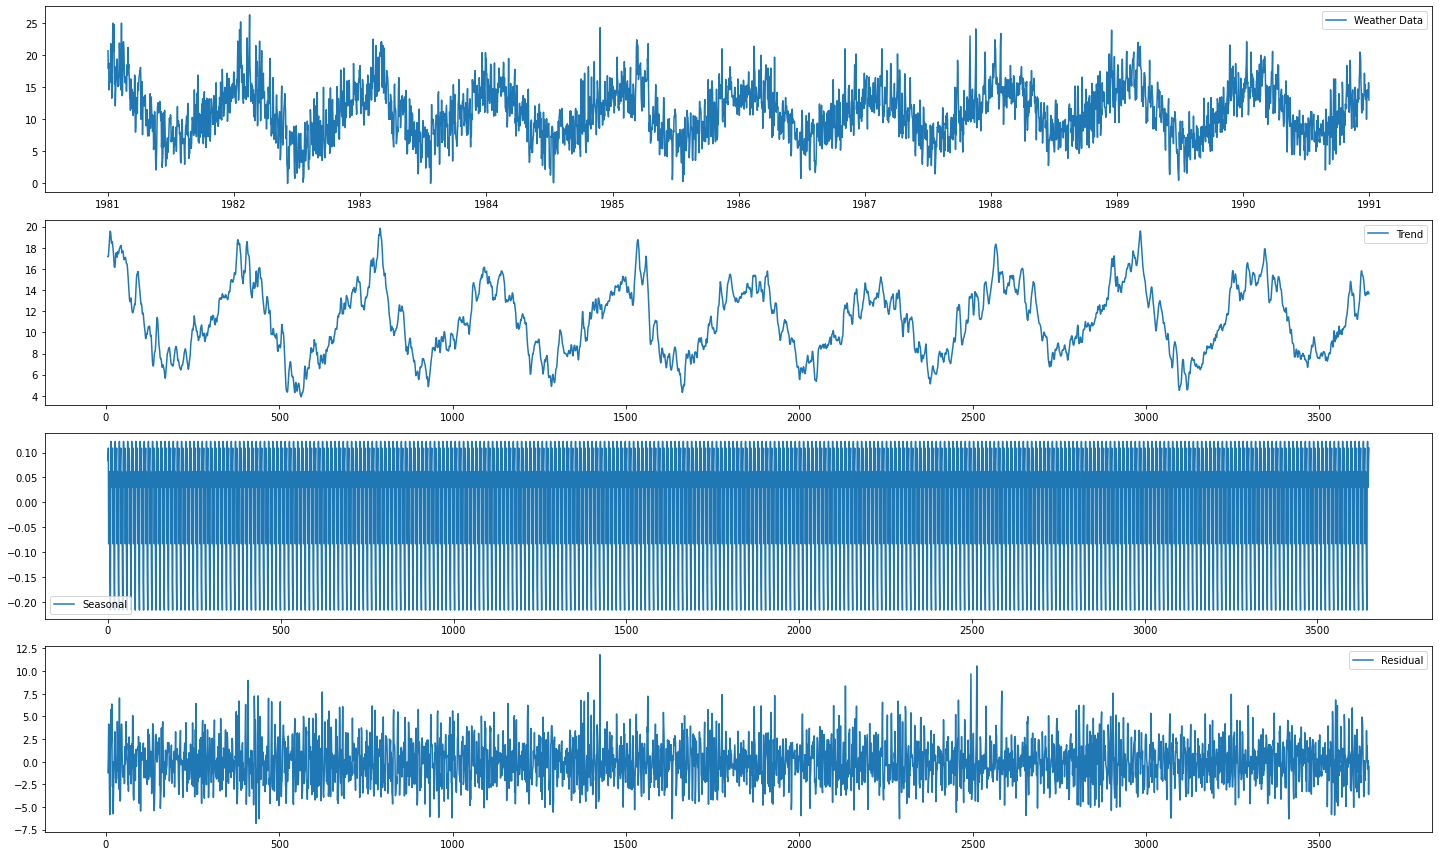

In [25]:
# TASK 2
decomposition = seasonal_decompose(np.asarray(df1), freq=12)

d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(df1,label='Weather Data')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

In [15]:
# TASK 3
df3 = df.drop(['Date'],axis=1)
df3

,Temp
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8
...,...
3645,14.0
3646,13.6
3647,13.5
3648,15.7


In [16]:
def checkStationarity(data):
    pvalue = adfuller(data['Temp'])[1]

    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return msg

In [17]:
print(checkStationarity(df3))

pvalue=0.00024708263003611787. Data is Stationary. Proceed to model building


In [18]:
print('Here, Data is stationary as our value < 0.05')

Here, Data is stationary as our value < 0.05


In [26]:
# TASK 4
df1

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [27]:
#  Implementing Double Exponent Smoothing (trend, but no seasonality)

model = ExponentialSmoothing(df1,trend='additive').fit(smoothing_level=0.2, smoothing_slope=0.5)

f_dexp = model.fittedvalues
print(f_dexp)

Date
1981-01-01    16.180457
1981-01-02    17.000627
1981-01-03    17.186700
1981-01-04    17.676889
1981-01-05    16.921351
                ...    
1990-12-27    13.729330
1990-12-28    13.645129
1990-12-29    13.493255
1990-12-30    13.352431
1990-12-31    13.914528
Length: 3650, dtype: float64


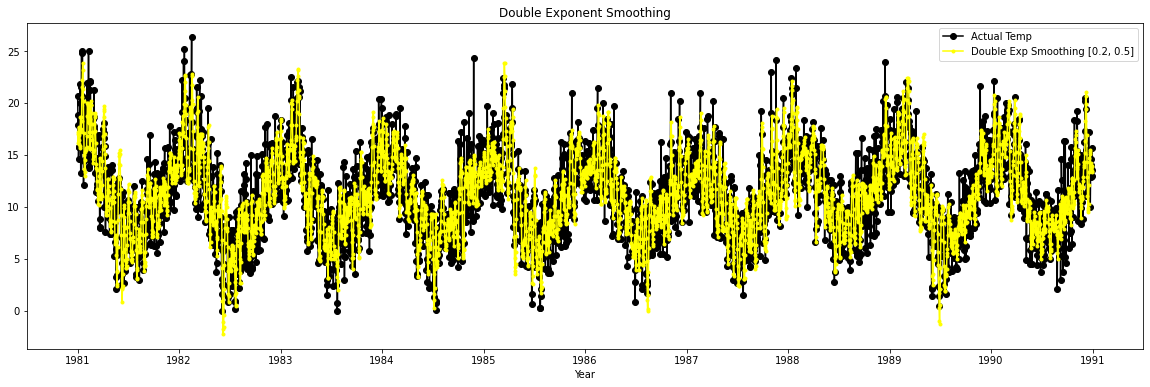

In [28]:
plt.figure(figsize=(20,6))
plt.plot(df1,marker='o',color='black',label='Actual Temp')
plt.plot(f_dexp, marker='.',color='yellow',label='Double Exp Smoothing [0.2, 0.5]')
plt.legend()
plt.title('Double Exponent Smoothing')
plt.xlabel('Year')
plt.show()

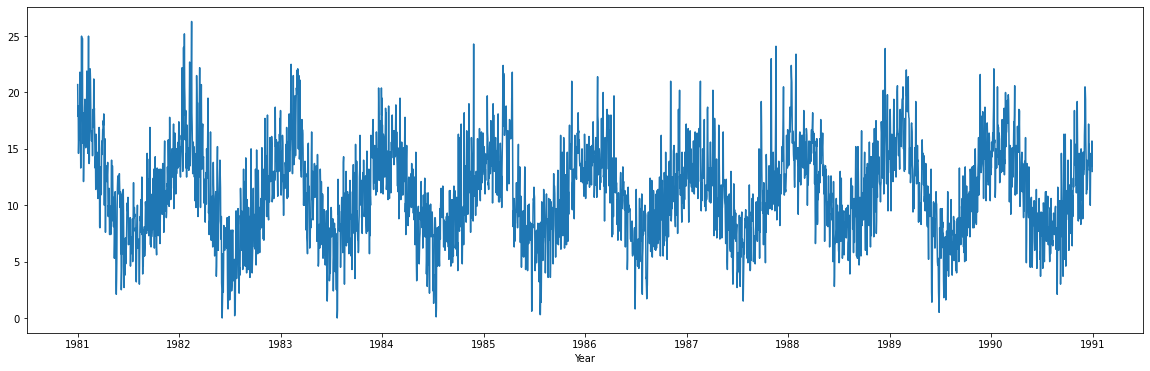

In [29]:
plt.figure(figsize=(20,6))
plt.plot(df1)
plt.xlabel('Year')
plt.show()